In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('../data/Dataset_maternal_mental_health_infant_sleep.csv', encoding='latin-1', sep=';')

/var/folders/p6/b16fkpd508j8307_nxc17wjc0000gn/T/ipykernel_2326/1178797082.py:1: DtypeWarning: Columns (6,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Dataset_maternal_mental_health_infant_sleep.csv', encoding='latin-1', sep=';')


In [18]:
k = ['Type_parents', 'Birth_1mth_M_inclusion',
       'Birth_12mth_M_inclusion', 'Age', 'Marital_status', 'Marital_status_edit', 'Education',
       'Gestationnal_age', 'Type_pregnancy', 'sex_baby1', 'CBTS_M_3',
       'CBTS_M_4', 'CBTS_M_5', 'CBTS_M_6', 'CBTS_M_7', 'CBTS_M_8', 'CBTS_M_9',
       'CBTS_M_10', 'CBTS_M_11', 'CBTS_M_12', 'CBTS_13', 'CBTS_14', 'CBTS_15',
       'CBTS_16', 'CBTS_17', 'CBTS_18', 'CBTS_19', 'CBTS_20', 'CBTS_21',
       'CBTS_22', 'EPDS_1', 'EPDS_2', 'EPDS_3', 'EPDS_4', 'EPDS_5', 'EPDS_6',
       'EPDS_7', 'EPDS_8', 'EPDS_9', 'EPDS_10', 'HADS_1', 'HADS_3', 'HADS_5',
       'HADS_7', 'HADS_9', 'HADS_11', 'HADS_13', 'Child_survey_participation',
       'Age_bb']
#      'IBQ_R_VSF_3_bb1', 'IBQ_R_VSF_4_bb1', 'IBQ_R_VSF_9_bb1',
#        'IBQ_R_VSF_10_bb1', 'IBQ_R_VSF_16_bb1', 'IBQ_R_VSF_17_bb1',
#        'IBQ_R_VSF_28_bb1', 'IBQ_R_VSF_29_bb1', 'IBQ_R_VSF_32_bb1',
#        'IBQ_R_VSF_33_bb1', 'how_falling_asleep_bb1']

In [19]:
df = df.dropna(subset=k)

In [20]:
X = df[['Type_parents', 'Birth_1mth_M_inclusion',
       'Birth_12mth_M_inclusion', 'Age', 'Marital_status', 'Marital_status_edit', 'Education',
       'Gestationnal_age', 'Type_pregnancy', 'sex_baby1', 'CBTS_M_3',
       'CBTS_M_4', 'CBTS_M_5', 'CBTS_M_6', 'CBTS_M_7', 'CBTS_M_8', 'CBTS_M_9',
       'CBTS_M_10', 'CBTS_M_11', 'CBTS_M_12', 'CBTS_13', 'CBTS_14', 'CBTS_15',
       'CBTS_16', 'CBTS_17', 'CBTS_18', 'CBTS_19', 'CBTS_20', 'CBTS_21',
       'CBTS_22', 'EPDS_1', 'EPDS_2', 'EPDS_3', 'EPDS_4', 'EPDS_5', 'EPDS_6',
       'EPDS_7', 'EPDS_8', 'EPDS_9', 'EPDS_10', 'HADS_1', 'HADS_3', 'HADS_5',
       'HADS_7', 'HADS_9', 'HADS_11', 'HADS_13', 'Child_survey_participation',
       'Age_bb']]
#         'IBQ_R_VSF_3_bb1', 'IBQ_R_VSF_4_bb1', 'IBQ_R_VSF_9_bb1',
#        'IBQ_R_VSF_10_bb1', 'IBQ_R_VSF_16_bb1', 'IBQ_R_VSF_17_bb1',
#        'IBQ_R_VSF_28_bb1', 'IBQ_R_VSF_29_bb1', 'IBQ_R_VSF_32_bb1',
#        'IBQ_R_VSF_33_bb1']]
y = df['how_falling_asleep_bb1']

In [21]:
dict(X.loc[0])

{'Type_parents': 1.0,
 'Birth_1mth_M_inclusion': 1.0,
 'Birth_12mth_M_inclusion': 1.0,
 'Age': 34.0,
 'Marital_status': 2.0,
 'Marital_status_edit': 2.0,
 'Education': 5.0,
 'Gestationnal_age': 37.0,
 'Type_pregnancy': 1.0,
 'sex_baby1': 1.0,
 'CBTS_M_3': 0.0,
 'CBTS_M_4': 0.0,
 'CBTS_M_5': 0.0,
 'CBTS_M_6': 0.0,
 'CBTS_M_7': 0.0,
 'CBTS_M_8': 0.0,
 'CBTS_M_9': 0.0,
 'CBTS_M_10': 1.0,
 'CBTS_M_11': 0.0,
 'CBTS_M_12': 0.0,
 'CBTS_13': 0.0,
 'CBTS_14': 0.0,
 'CBTS_15': 0.0,
 'CBTS_16': 0.0,
 'CBTS_17': 2.0,
 'CBTS_18': 0.0,
 'CBTS_19': 2.0,
 'CBTS_20': 0.0,
 'CBTS_21': 0.0,
 'CBTS_22': 1.0,
 'EPDS_1': 1.0,
 'EPDS_2': 2.0,
 'EPDS_3': 2.0,
 'EPDS_4': 1.0,
 'EPDS_5': 1.0,
 'EPDS_6': 2.0,
 'EPDS_7': 0.0,
 'EPDS_8': 2.0,
 'EPDS_9': 2.0,
 'EPDS_10': 0.0,
 'HADS_1': 2.0,
 'HADS_3': 1.0,
 'HADS_5': 2.0,
 'HADS_7': 2.0,
 'HADS_9': 0.0,
 'HADS_11': 1.0,
 'HADS_13': 1.0,
 'Child_survey_participation': 1.0,
 'Age_bb': 1.0}

<AxesSubplot:>

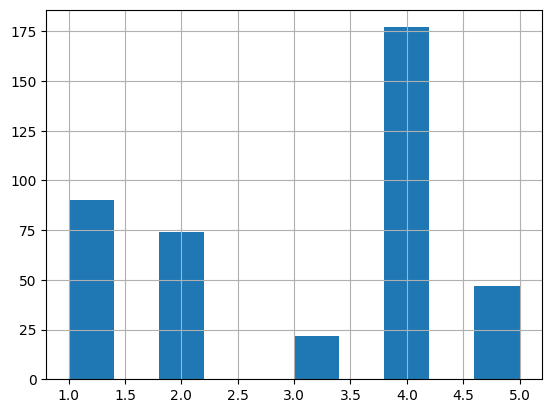

In [22]:
df['how_falling_asleep_bb1'].hist()

In [23]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                   stratify=y)

In [25]:
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [26]:
y_pred = clf.predict(X_test)

In [27]:
accuracy_score(y_pred, y_test)

0.43902439024390244

In [28]:
confusion_matrix(y_pred, y_test)

array([[ 2,  2,  0,  1,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0],
       [16, 13,  4, 34,  9],
       [ 0,  0,  0,  0,  0]])

In [29]:
y_pred

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 1., 4., 4., 4., 4., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 1., 4., 4., 1., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 2., 4., 4., 4., 4., 4., 4., 1., 4., 4., 4.])

In [30]:
y_test

154    3.0
272    1.0
165    4.0
223    3.0
299    5.0
      ... 
354    1.0
381    4.0
350    3.0
221    2.0
187    4.0
Name: how_falling_asleep_bb1, Length: 82, dtype: float64

In [31]:
y_train

46     2.0
196    1.0
284    5.0
99     4.0
282    3.0
      ... 
143    3.0
106    3.0
368    4.0
256    2.0
374    2.0
Name: how_falling_asleep_bb1, Length: 328, dtype: float64

## Save model

In [32]:
import joblib
joblib.dump(clf, 'baseline_pipline.pkl')

['baseline_pipline.pkl']

In [33]:
# example for reading pipline

clf_model = joblib.load('baseline_pipline.pkl')

In [36]:
import joblib
model_path = '../models/baseline_pipline.pkl'
import joblib

pipeline = joblib.load(model_path)

/usr/local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator Pipeline from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please re

array([[ 1.,  1.,  1., 34.,  2.,  2.,  5., 37.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
         2.,  0.,  0.,  1.,  1.,  2.,  2.,  1.,  1.,  2.,  0.,  2.,  2.,
         0.,  2.,  1.,  2.,  2.,  0.,  1.,  1.,  1.,  1.]])

In [51]:
prediction = pipeline.predict([list(k.values())])
prediction

/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.])

In [38]:
k = dict(X.loc[0])